In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the submatrices A, B and y from the file watermatrices
A_mat = np.array([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]]);

B_mat = np.array([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]]);

y_vec = np.array([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180]);

In [3]:
# Construct the matrices E
E_mat = np.block([ [A_mat, B_mat], [B_mat, A_mat] ])

# Construct the matrix S
ZERO_mat = np.zeros([7,7])
I_mat = np.identity(7)
S_mat = np.block([ [I_mat, ZERO_mat], [ZERO_mat, -I_mat] ])

# Construct the vector z
z_vec = np.concatenate([ [y_vec],[-y_vec] ], axis=1).flatten()

# Questions for Week 1

## A(1)

In [4]:
# Function to calculate the infinity norm sometimes called max norm
def max_norm(M):
    
    # Get the absolute value of the matrix
    M_abs = np.absolute(M)
    
    # Sum each row of the absolute matrix
    M_sum = np.sum(M_abs, axis=1)
    
    # Return the largest row sum
    return np.max(M_sum) 

# We define a function to do calculate the condition number of a matrix
def cond(M):
    
    # Calculate the inverse matrix M^-1
    Minv = np.linalg.inv(M)
    
    # Calculate the max norms and multiply them together to get the condition number
    cond_number = max_norm(M) * max_norm(Minv)
    
    return cond_number

## A(2)

In [5]:
# Define the three frequencies
omegas = [1.300, 1.607, 2.700]

# Lets calculate the condition numbers
condition_numbers = [cond(E_mat - omegas[i] * S_mat) for i in np.arange(3)]

#Print results
for i in range(3):
    print(f'For omega {omegas[i]:.3f} the cond number is {condition_numbers[i]}')

For omega 1.300 the cond number is 303.0741906688338
For omega 1.607 the cond number is 327825.2278438225
For omega 2.700 the cond number is 35.55204847098013


In [6]:
# Calculate the relative error on x
frac_err_xs = [condition_numbers[i] * 10**(-8) for i in np.arange(3)]

# Number of significant digits
sig_digits = [-np.log10(frac_err_xs[i]) for i in np.arange(3)]

#Print results
for i in range(3):
    print(f'For omega {omegas[i]:.3f} the number of sig. digits in x is is {sig_digits[i]}')

For omega 1.300 the number of sig. digits in x is is 5.518451045906735
For omega 1.607 the number of sig. digits in x is is 2.4843576282768707
For omega 2.700 the number of sig. digits in x is is 6.449135370630066


## B(1)

In [7]:
# Define error on omega
delta_omega = 0.5*10**(-3)

# Calculate |E|/|A|
E_A = [max_norm(delta_omega*S_mat) / max_norm(E_mat - omegas[i]*S_mat) for i in np.arange(3)]

# Calculate the bounds
forward_bounds = [condition_numbers[i] * E_A[i] for i in np.arange(3)]

# Print results
for i in range(3):
    print(f'For omega {omegas[i]:.3f} the relative forward error bound is {forward_bounds[i]:.4f}')

For omega 1.300 the relative forward error bound is 0.0048
For omega 1.607 the relative forward error bound is 5.0900
For omega 2.700 the relative forward error bound is 0.0005


## B(2)

In [8]:
# Number of significant digits if omega is given with 3 digits after the comma
sig_digits2 = [-np.log10(forward_bounds[i]) for i in np.arange(3)]

#Print results
for i in range(3):
    print(f'For omega {omegas[i]:.3f} the no. of sig. digits is {sig_digits2[i]:.4f}')

For omega 1.300 the no. of sig. digits is 2.3232
For omega 1.607 the no. of sig. digits is -0.7067
For omega 2.700 the no. of sig. digits is 3.2726


## C(1)

In [9]:
# Define a function to perform LU factorization on a square matrix M
def lu_factorize(M):
    
    # Check that the input matrix is in fact square
    if M.shape[0] != M.shape[1]:
        print('Input matrix is not square')
    
    # Initialise L as an identity matrix of the same dimensions as M
    n = M.shape[0]
    L = np.identity(n)
    A = M.copy() #copy to not change input
    U = np.zeros(A.shape)
    
    # Loop over all columns except the last one
    for k in range(n-1):
        
        # Stop if the pivot is zero (the element in the diagonal of given column)
        if A[k,k] == 0:
            print('Encountered pivot equal to zero')
            return
        
        # Loop over the subdiagonal rows in the given column
        for i in range(k+1, n):
            
            # Find the value for all subdiagonal elements in L
            L[i,k] = A[i,k] / A[k,k]
            
        # Loop again, combinations of j,i,k will give us elements of the submatrix in bottom right    
        for j in range(k+1,n):
            for i in range(k+1,n):
                
                # Apply transoformation to the remaining submatrix
                A[i,j] = A[i,j] - L[i,k]*A[k,j]
    
        # Assign upper triangular part of the transformed M to U
        U[:k+1,k] = A[:k+1,k] #rows, columns k+1 because the last element is not included when using :
    
    # Assign also the last column which is not used above because we range until n-1
    U[:, -1] = A[:, -1]
    
    return L, U

## C(2)

In [10]:
# We define the function
def forward_substitute(L, b):
    
    # Make empty array for solution vector y
    n = L.shape[0]
    y_vec = np.zeros(n)
    
    # Make copy of b so we dont change the values when updating
    b_copy = b.copy()
    
    # Loop over columns in the L matrix
    for j in range(n):
        
        # Stop if matrix is singular
        if L[j,j] == 0:
            print('Singular matrix encountered. Cannot procede.')
            return
        
        # Compute solution component, i.e. the solution to the i'th linear equation
        y_vec[j] = b_copy[j] / L[j,j]
        
        # Update right hand side
        for i in range(j+1,n):
            b_copy[i] = b_copy[i] - L[i,j] * y_vec[j]
        
    return y_vec

## C(3)

In [11]:
def back_substitute(U,y):
    
    # Make empty array for solution vector x
    n_rows, n_cols = U.shape
    x_vec = np.zeros(n_cols)
    
    # Make copy of y so we dont change the values when updating
    y_copy = y.copy()
    
    # Loop backwards over columns
    
    for j in reversed(range(n_rows)):
        
        # Stop if matrix is singular
        if j+1 > n_cols: continue
        else:
            if U[j,j] == 0:
                print('Singular matrix encountered. Cannot procede.')
                return
        
        # Compute solution component
        x_vec[j] = y_copy[j] / U[j,j]
        
        for i in range(0,j):
            y_copy[i] = y_copy[i] - U[i,j] * x_vec[j]
            
    return x_vec

## C test

In [12]:
# Make a function that combines it
def linear_solver(A,b): 
    """
    A = coefficient matrix
    b = dependent variable values
    """
    A = A.copy()
    L, U = lu_factorize(A)
    y = forward_substitute(L, b)
    x = back_substitute(U, y)
    
    return x

In [13]:
# This is the system we will check
A_test = np.array([ [2,1,1],[4,1,4],[-6, -5, 3] ])
print(A_test)

y_test = np.array([ 4, 11, 4 ]).reshape(3,1)
print(y_test)

# Solving it with numpy linalg to see what x ought to be.
sol_numpy = np.linalg.solve(A_test,y_test)
print(sol_numpy)

# Solving it with my own implementation
my_sol = linear_solver(A_test, y_test)
print(my_sol)

[[ 2  1  1]
 [ 4  1  4]
 [-6 -5  3]]
[[ 4]
 [11]
 [ 4]]
[[-4.]
 [ 7.]
 [ 5.]]
[-4.  7.  5.]


## D(1)

In [14]:
# Define the function
def solve_alpha(omega):
    
    # Get matrix that is multiplied on x on the left hand side
    matrix = E_mat - omega*S_mat
    
    # Calculate x
    X = linear_solver(matrix, z_vec)
    
    # Calculate omega
    alpha = np.dot(z_vec.T, X)
    
    return alpha

## D(2)

In [15]:
# Find alpha for each of the omegas
alphas = [solve_alpha(omegas[i]) for i in np.arange(3)]

# Find lower bound alpha
alphas_low = [solve_alpha(omegas[i]-delta_omega) for i in np.arange(3)]

# Find upper bound alpha
alphas_high = [solve_alpha(omegas[i]+delta_omega) for i in np.arange(3)]

# Print results:
print('Alpha_low, Alpha, Alpha_high')
for i in range(3):
    print(f'For omega={omegas[i]:.3f}: {alphas_low[i]:.4f}, {alphas[i]:.4f}, {alphas_high[i]:.4f}')

Alpha_low, Alpha, Alpha_high
For omega=1.300: -4.8934, -4.8759, -4.8586
For omega=1.607: 151.0967, -434.9606, -91.0935
For omega=2.700: -0.3761, -0.3759, -0.3758


## E(1)

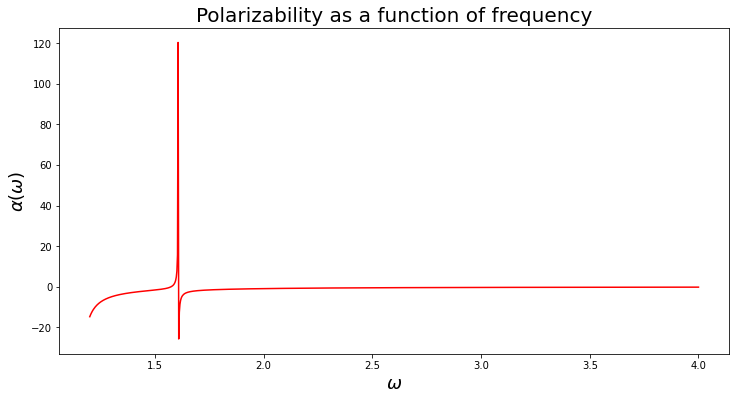

In [16]:
# Define omegas in the interval 1.2 to 4 with 1000 values
omegas_E = np.linspace(1.2,4,1000)

# Calculate the corresponding alphas
alphas_E = np.array([solve_alpha(omegas_E[i]) for i in range(len(omegas_E)) ])

# Plotting it
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(omegas_E, alphas_E, color='red')
ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_ylabel(r'$\alpha(\omega)$', fontsize=18)
ax.set_title('Polarizability as a function of frequency', fontsize=20)
plt.show()

## E(2)

In [17]:
print(f'{cond(E_mat-1.60686978*S_mat):.2e}')

1.73e+10


## F(1)

In [18]:
def householder_qr(A, rounded=False, decimals=4):
    """
    Description
    """
    
    # Inititalise R as a copy of A to not change the original matrix - same goes for b
    R = A.copy()
    
    # Get dimensions of matrix A
    n_rows, n_cols = A.shape
    
    # Check that m>n so the procedure is possible
    if n_rows<n_cols:
        print('Encountered matrix with more columns than rows. System is unsolvable.')
        return
    
    # Initialise Q as an identity matrix
    Q = np.identity(n_rows)
    
    ######################################
    ### Compute the householder vector ###
    ######################################
    
    # Loop over columns
    for j in range(n_cols):
        
        # Let a be the j'th column of the matrix A or submatrix depending on iteration
        a = R[j:,j]
        
        # Calculate the norm of a
        norm_a = np.sqrt( np.sum(a**2) )
        
        # Calculate the alpha which is the proper sign (to avoid nummerical cancellation errors) times the norm
        alpha = -np.sign(a[0]) * norm_a
        
        # Make the first standard basis vector for the matrix or subbmatrix
        e = np.zeros_like(a)
        e[0] = 1
        
        # Initialise a householder vector 'u': the vector 'a' minus 'alpha' on the diagonal element
        v = a - alpha*e
        
        # Normalise it
        v = v/np.sqrt(np.sum(v**2))

        """
        check that something is not zero - is it a[j]?
        """
        #############################################
        ### Compute the householder vector matrix ###
        #############################################
    
        # Compute the Householder matrix (notice that H_n with n>0 are embedded into a mxn identity)
        H = np.identity(n_rows)
        H[j:,j:] -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :]) #normalise twice?

        #################################
        ### Compute Q,R and b' from H ###
        #################################
        
        # Q = I*H_1*H_2...
        Q = Q@H
        
        # Get R from H_3*H_2*H_1*A=R_3
        R = H@R
        
    if rounded:
        Q = np.round_(Q, decimals=decimals)
        R = np.round_(R, decimals=decimals)
            
    return Q, R

In [19]:
# Check that it works
A_test2 = np.array([ [1,0,0], [0,1,0], [0,0,1], [-1,1,0], [-1,0,1], [0, -1, 1] ])
b_test2 = np.array([1237,1941,2417,711,1177,475]).reshape(6,1)

# Perform QR
Q_test_my, R_test_my = householder_qr(A_test2,rounded=True)

# Check Q is orthogonal
print(np.round_(Q_test_my.T @ Q_test_my, decimals=3), np.round_(Q_test_my @ Q_test_my.T, decimals=3))

# Check A=QR


[[ 1. -0. -0.  0. -0. -0.]
 [-0.  1.  0.  0. -0.  0.]
 [-0.  0.  1. -0. -0. -0.]
 [ 0.  0. -0.  1. -0.  0.]
 [-0. -0. -0. -0.  1. -0.]
 [-0.  0. -0.  0. -0.  1.]] [[ 1.  0.  0. -0. -0.  0.]
 [ 0.  1.  0.  0.  0. -0.]
 [ 0.  0.  1. -0.  0.  0.]
 [-0.  0. -0.  1. -0.  0.]
 [-0.  0.  0. -0.  1. -0.]
 [ 0. -0.  0.  0. -0.  1.]]


In [20]:
# A=QR
print(np.round_(Q_test_my@R_test_my, decimals=3), A_test2)

[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1.  1.  0.]
 [-1.  0.  1.]
 [ 0. -1.  1.]] [[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]


## F(2)

In [21]:
def least_squares(A,b):
    
    # Perform QR factorisation on A
    Q, R = householder_qr(A)
    
    # Get the transformed right hand side vector b
    b_trans = Q.T@b
    
    # Solve the upper rectangular matrix R with back substitution
    n_rows, n_cols = A.shape
    x = back_substitute(R,b_trans) #why do we need to cut it off here?
    
    return x

## F test

In [22]:
print(least_squares(A_test2,b_test2), np.linalg.lstsq(A_test2,b_test2)[0].reshape(-1))

[1236. 1943. 2416.] [1236. 1943. 2416.]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


## G(1)

In [23]:
omegas_G = omegas_E[omegas_E < 1.5]
alphas_G = alphas_E[omegas_E < 1.5]
print(f'We are working with {len(omegas_G)} points to fit')

We are working with 108 points to fit


## G(2)

In [24]:
# Function to obtain the coefficients
def get_P_coef(n, omega_arr, alpha_arr):
   
    # Get number of points aka rows in matrix A
    n_rows = len(omega_arr)
    
    # Number of cols is n+1 since the sum starts at zero
    n_cols = n+1
    
    # Construct matrix A shape to store values in
    A = np.zeros((n_rows,n_cols))

    # Fill the matrix
    for j in range(n_cols):
        A[:,j] = omega_arr**(2*j)

    coef = least_squares(A,alpha_arr)
    
    return coef

In [25]:
# Get coefficients for n=4
coef_P4 = get_P_coef(4, omegas_G, alphas_G)
print(f'The coefficient in the polynomium with n=4 are: {coef_P4}')

The coefficient in the polynomium with n=4 are: [-1949.53883611  3985.39169934 -3064.07789089  1046.99794255
  -133.96913874]


## G(3) + G(4)

In [26]:
# Get coefficients for n=6
coef_P6 = get_P_coef(6, omegas_G, alphas_G)
print(f'The coefficient in the polynomium with n=6 are: {coef_P6}')

The coefficient in the polynomium with n=6 are: [ -34328.87937315  108315.30299895 -142311.16513415   99590.19297135
  -39135.25229908    8185.59968404    -711.81695042]


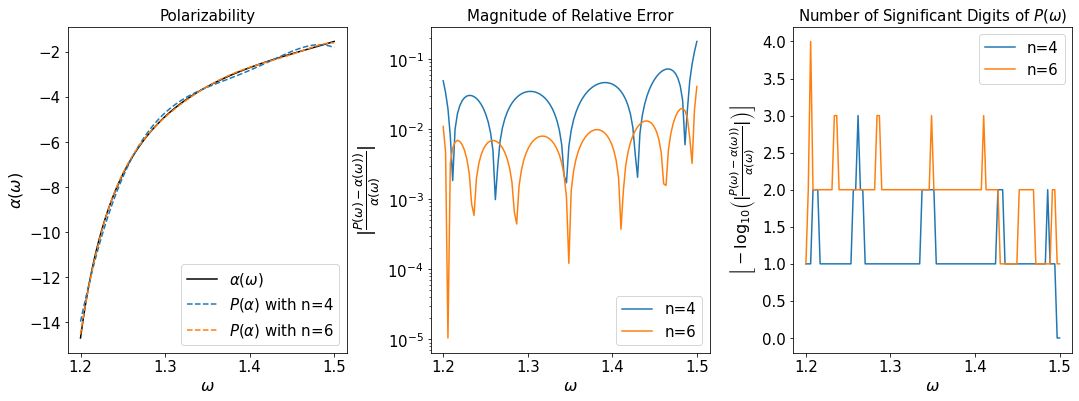

In [27]:
# Create functions so we can plot it
def pol4(x, a0, a1, a2, a3, a4):
    return a0 + a1*x**2 + a2*x**4 + a3*x**6 + a4*x**8

def pol6(x, a0, a1, a2, a3, a4, a5, a6):
    return a0 + a1*x**2 + a2*x**4 + a3*x**6 + a4*x**8 + a5*x**10 + a6*x**12

# Get alpha arrays
alphas_P4 = pol4(omegas_G, *coef_P4)
alphas_P6 = pol6(omegas_G, *coef_P6)

# Plot
fig, ax = plt.subplots(ncols=3, figsize=(18,6), gridspec_kw={'wspace':0.3})

# alpha(omega)
ax[0].plot(omegas_G, alphas_G, label=r'$\alpha(\omega)$', color='k')
ax[0].plot(omegas_G, alphas_P4, label=r'$P(\alpha)$ with n=4', linestyle='dashed', color='C0')
ax[0].plot(omegas_G, alphas_P6, label=r'$P(\alpha)$ with n=6', linestyle='dashed', color='C1')
ax[0].legend(fontsize=15)
ax[0].set_xlabel(r'$\omega$', fontsize=16)
ax[0].set_ylabel(r'$\alpha(\omega)$', fontsize=16)
ax[0].set_title('Polarizability', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=15)

# Relative error
ax[1].plot(omegas_G, abs((alphas_P4-alphas_G)/alphas_G), label='n=4', color='C0')
ax[1].plot(omegas_G, abs((alphas_P6-alphas_G)/alphas_G), label='n=6', color='C1')
ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].set_xlabel(r'$\omega$', fontsize=16)
ax[1].set_ylabel(r'$\left|\frac{P(\omega)-\alpha(\omega))}{\alpha(\omega)}\right|$', fontsize=18)
ax[1].set_title('Magnitude of Relative Error', fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)

# Significant digits
ax[2].plot(omegas_G, np.floor(-np.log10(abs((alphas_P4-alphas_G)/alphas_G))), color='C0', label='n=4')
ax[2].plot(omegas_G, np.floor(-np.log10(abs((alphas_P6-alphas_G)/alphas_G))), color='C1', label='n=6')
ax[2].set_xlabel(r'$\omega$', fontsize=16)
ax[2].legend(fontsize=15)
ax[2].set_ylabel(r'$\left\lfloor -\log_{10}\left(\left|\frac{P(\omega)-\alpha(\omega))}{\alpha(\omega)}\right|\right)\right\rfloor$', fontsize=16)
ax[2].set_title(r'Number of Significant Digits of $P(\omega)$', fontsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)

plt.show()

## H(1) + H(2)

In [28]:
# Function to obtain the coefficients
def get_Q_coef(n, omega_arr, alpha_arr):
   
    # Get number of points aka rows in matrix A
    n_rows = len(omega_arr)
    
    # Number of columns is 2n+1 since the a sum starts at zero
    n_cols = 2*n+1
    
    # Construct matrix A shape to store values in
    A = np.zeros((n_rows,n_cols))

    # Fill matrix
    
    # Start with the a terms
    for i in range(0,n+1):
        A[:,i] = omega_arr**i
    
    # Now for the b terms, starts after the column where A ends
    for j in range(1,n+1):
        A[:,j+n] = -alpha_arr*omega_arr**j

    # Get coefficients from least squares routine    
    coef = least_squares(A, alpha_arr)
    
    return coef

In [29]:
# Create function for n=2
def Q2(x, a0, a1, a2, b1, b2):
    alpha = solve_alpha(x)
    a_term = a0 + a1*x + a2*x**2
    b_term = b1*alpha*x + b2*alpha*x**2
    return a_term - b_term

# Get coefficients (we use omegas E since these already span from 1.2 to 4)
coef_Q2 = get_Q_coef(2, omegas_E, alphas_E)

# Calculate approximated alphas
alphas_Q2 = np.array([Q2(omegas_E[i], *coef_Q2) for i in range(len(omegas_E))])

In [30]:
# Do the same for n=4

# Create function for n=2
def Q4(x, a0, a1, a2, a3, a4, b1, b2, b3, b4):
    alpha = solve_alpha(x)
    a_term = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4
    b_term = b1*alpha*x + b2*alpha*x**2 + b3*alpha*x**3 + b4*alpha*x**4
    return a_term - b_term

# Get coefficients (we use omegas E since these already span from 1.2 to 4)
coef_Q4 = get_Q_coef(4, omegas_E, alphas_E)

# Calculate approximated alphas
alphas_Q4 = np.array([Q4(omegas_E[i], *coef_Q4) for i in range(len(omegas_E))])

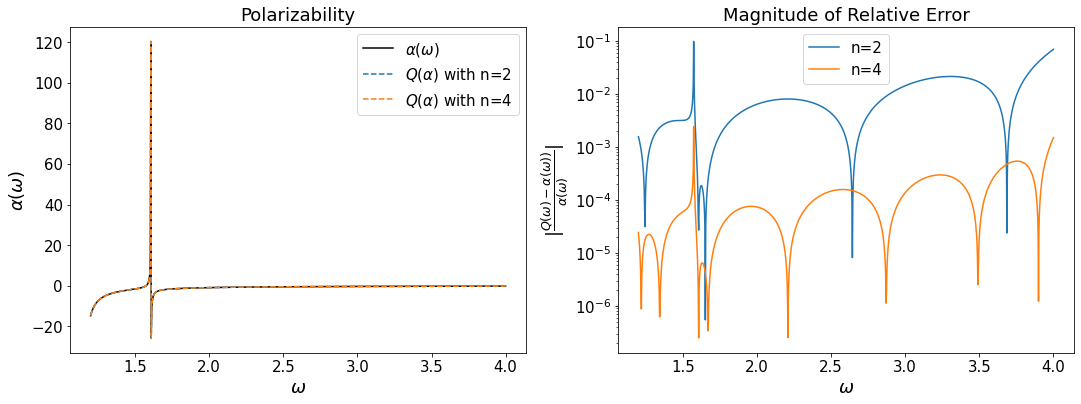

In [31]:
# Plot the functions and the relative error
fig, ax = plt.subplots(ncols=2, figsize=(18,6), gridspec_kw={'wspace':0.2})

# alpha(omega)
ax[0].plot(omegas_E, alphas_E, label=r'$\alpha(\omega)$', color='k')
ax[0].plot(omegas_E, alphas_Q2, label=r'$Q(\alpha)$ with n=2', linestyle='dashed', color='C0')
ax[0].plot(omegas_E, alphas_Q4, label=r'$Q(\alpha)$ with n=4', linestyle='dashed', color='C1')
ax[0].legend(fontsize=15)
ax[0].set_xlabel(r'$\omega$', fontsize=18)
ax[0].set_ylabel(r'$\alpha(\omega)$', fontsize=18)
ax[0].set_title('Polarizability', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=15)

# Relative error
ax[1].plot(omegas_E, abs((alphas_Q2-alphas_E)/alphas_E), label='n=2', color='C0')
ax[1].plot(omegas_E, abs((alphas_Q4-alphas_E)/alphas_E), label='n=4', color='C1')
ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].set_xlabel(r'$\omega$', fontsize=18)
ax[1].set_ylabel(r'$\left|\frac{Q(\omega)-\alpha(\omega))}{\alpha(\omega)}\right|$', fontsize=18)
ax[1].set_title('Magnitude of Relative Error', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.show()

## H(3)

In [32]:
# Get 3000 evenly spaced points from omega -4 to 4. We expand to 3000 since it 
# is a larger span now and lstsq is sensitive to outliers.
omegas_H = np.linspace(-4,4,3000)
alphas_H = np.array([solve_alpha(omegas_H[i]) for i in range(3000)])

In [33]:
# Adapt Q2 to span entire -4 to 4
# Get coefficients
coef_Q2_H = get_Q_coef(2, omegas_H, alphas_H)

# Calculate approximated alphas
alphas_Q2_H = np.array([Q2(omegas_H[i], *coef_Q2_H) for i in range(len(omegas_H))])

In [34]:
# Adapt Q4 to span entire -4 to 4
# Get coefficients
coef_Q4_H = get_Q_coef(4, omegas_H, alphas_H)

# Calculate approximated alphas
alphas_Q4_H = np.array([Q4(omegas_H[i], *coef_Q4_H) for i in range(len(omegas_H))])

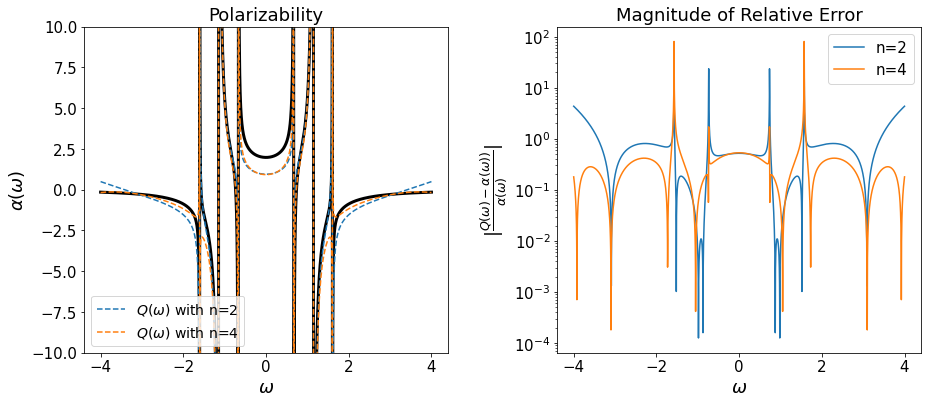

In [35]:
# Plot it
fig, ax = plt.subplots(ncols=2, figsize=(15,6), gridspec_kw={'wspace':0.3})

# Functions
ax[0].plot(omegas_H, alphas_H, color='k', linewidth=3)
ax[0].plot(omegas_H, alphas_Q2_H, label=r'$Q(\omega)$ with n=2', linestyle='dashed')
ax[0].plot(omegas_H, alphas_Q4_H, label=r'$Q(\omega)$ with n=4', linestyle='dashed')
ax[0].set_ylim(-10,10)
ax[0].legend(fontsize=14, loc='lower left')
ax[0].set_xlabel(r'$\omega$', fontsize=18)
ax[0].set_ylabel(r'$\alpha(\omega)$', fontsize=18)
ax[0].set_title('Polarizability', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=15)

# Rel error
ax[1].plot(omegas_H, abs((alphas_Q2_H-alphas_H)/alphas_H), label='n=2', color='C0')
ax[1].plot(omegas_H, abs((alphas_Q4_H-alphas_H)/alphas_H), label='n=4', color='C1')
ax[1].set_yscale('log')
ax[1].legend(fontsize=15)
ax[1].set_xlabel(r'$\omega$', fontsize=18)
ax[1].set_ylabel(r'$\left|\frac{Q(\omega)-\alpha(\omega))}{\alpha(\omega)}\right|$', fontsize=18)
ax[1].set_title('Magnitude of Relative Error', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=15)